# INDIVIDUAL ID : PTID-CDS-FEB-24-1817

# BATCH ID : 16-OCT-23-WDM09-BAN

# PROJECT : PRCP-1007-LiverPatientPred

# PROBLEM STATEMENT

TASK1:-PREPARE A COMPLETE DATA ANALYSIS REPORT ON THE GIVEN DATA

TASK2:-CREATE A PREDICTIVE MODEL WITH IMPLEMENTATION OF DIFFERENT CLASSIFIER ON LIVER PATIENT DISEASES DATASET TO PREDICTIVE LIVER DISEASES

TASK3:-CREATE AN ANALYSIS TO SHOW WHAT BASIS YOU HAVE DESIGNED YOUR MODEL

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

### LOADING DATA

In [2]:
data=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")
data

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


CHANGING COLUMN NAMES INTO ROW AND ADDING REAL COLUMN NAME

In [3]:
data=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",header=None)
data

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
data.rename(columns={0:'Age',1:'Gender',2:'T_Bill',3:'D_Bill',4:'ALP',5:'ALT',6:'AST',7:'T_Proteins',8:'Albumin',9:'A:G',10:'Target'},inplace=True)
data

,Age,Gender,T_Bill,D_Bill,ALP,ALT,AST,T_Proteins,Albumin,A:G,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# DOMAIN EXPERTISE


### 1.AGE
Age of different persons from whom the data is collected

### 2.GENDER
Sex diifference of persons in this dataset

### 3.T_BILL
A bilirubin test measures the amount of bilirubin in your blood. It’s used to help find the cause of health conditions like jaundice, anemia, and liver disease.
T_Bill(Total Bilirubin) is the combination of Direct Bilirubin and Indirect Bilirubin

### 4.D_BILL
D_Bill(Direct Bilirubin) is the form of bilirubin which has been conjugated with glucoronic acid and is excreted in the bile

### 5. ALP
Alkaline phosphatase (ALP) is an enzyme that’s found throughout your body. ALP blood tests measure the level of ALP in your blood that comes from your liver and bones, and it’s one of the tests included in a comprehensive metabolic panel. High levels of ALP in your blood may indicate liver disease or certain bone disorders.

### 6.ALT
Alanine aminotransferase (ALT) is an enzyme found primarily in the liver and kidney. It was originally referred to as serum glutamic pyruvic transaminase (SGPT). Normally, a low level of ALT exists in the serum. ALT is increased with liver damage and is used to screen for and/or monitor liver disease. Alanine aminotransferase (ALT) is usually measured concurrently with AST as part of a liver function panel to determine the source of organ damage. 

### 7.AST
AST (aspartate aminotransferase) is an enzyme that is found mostly in the liver, but also in muscles. When your liver is damaged, it releases AST into your bloodstream. An AST blood test measures the amount of AST in your blood. The test can help your health care provider diagnose liver damage or disease.

### 8.T_PROTEINS
Albumin and globulin are two types of protein in your body. The total protein test measures the total amount albumin and globulin in your body. It's used as part of your routine health checkup. It may also be used if you have unexpected weight loss, fatigue, or the symptoms of a kidney or liver disease.

### 9.ALBUMIN
Albumin is a protein made by your liver. Albumin helps keep fluid in your bloodstream so it doesn't leak into other tissues. It is also carries various substances throughout your body, including hormones, vitamins, and enzymes. Low albumin levels can indicate a problem with your liver or kidneys.

### 10.A:G
The Albumin and Globulin ratio (A:G) is the ratio of albumin present in serum in relation to the amount of globulin. The ratio can be interpreted only in light of the total protein concentration.

### 11.TARGET
field used to split the data into two sets (1 : patient with  liver disease and 2: patient with no liver disease disease)

# BASIC CHECKS

In [5]:
data.head()

,Age,Gender,T_Bill,D_Bill,ALP,ALT,AST,T_Proteins,Albumin,A:G,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
data.tail()

,Age,Gender,T_Bill,D_Bill,ALP,ALT,AST,T_Proteins,Albumin,A:G,Target
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [7]:
data.columns

Index(['Age', 'Gender', 'T_Bill', 'D_Bill', 'ALP', 'ALT', 'AST', 'T_Proteins',
       'Albumin', 'A:G', 'Target'],
      dtype='object')

In [8]:
data.shape

(583, 11)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         583 non-null    int64  
 1   Gender      583 non-null    object 
 2   T_Bill      583 non-null    float64
 3   D_Bill      583 non-null    float64
 4   ALP         583 non-null    int64  
 5   ALT         583 non-null    int64  
 6   AST         583 non-null    int64  
 7   T_Proteins  583 non-null    float64
 8   Albumin     583 non-null    float64
 9   A:G         579 non-null    float64
 10  Target      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [10]:
data.dtypes

Age             int64
Gender         object
T_Bill        float64
D_Bill        float64
ALP             int64
ALT             int64
AST             int64
T_Proteins    float64
Albumin       float64
A:G           float64
Target          int64
dtype: object

CHANGING GENDER FROM OBJECT TO INT AND TARGET VALUES REPLACED (1,2) TO (0,1)

In [11]:
data.Gender=data.Gender.replace({'Male':1,'Female':0})
data.Target=data.Target.replace(2,0)
data.head()

,Age,Gender,T_Bill,D_Bill,ALP,ALT,AST,T_Proteins,Albumin,A:G,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [12]:
data.describe()

,Age,Gender,T_Bill,D_Bill,ALP,ALT,AST,T_Proteins,Albumin,A:G,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [13]:
for i in data:
    print(i,data[i].value_counts())
    print('****************************************************************************')

Age Age
60    34
45    25
50    23
42    21
38    21
      ..
78     1
11     1
67     1
10     1
90     1
Name: count, Length: 72, dtype: int64
****************************************************************************
Gender Gender
1    441
0    142
Name: count, dtype: int64
****************************************************************************
T_Bill T_Bill
0.8     91
0.7     77
0.9     57
0.6     46
1.0     28
        ..
14.5     1
18.5     1
23.2     1
22.6     1
15.0     1
Name: count, Length: 113, dtype: int64
****************************************************************************
D_Bill D_Bill
0.2     194
0.1      63
0.3      51
0.8      22
0.4      21
       ... 
3.3       1
11.4      1
2.6       1
3.9       1
13.7      1
Name: count, Length: 80, dtype: int64
****************************************************************************
ALP ALP
198    11
215    11
298    11
195    10
190    10
       ..
335     1
505     1
228     1
247     1
184     1
Name: count, 

In [14]:
for i in data:
    print(i,data[i].unique())
    print('****************************************************************************')

Age [65 62 58 72 46 26 29 17 55 57 64 74 61 25 38 33 40 51 63 34 20 84 52 30
 48 47 45 42 50 85 35 21 32 31 54 37 66 60 19 75 68 70 49 14 13 18 39 27
 36 24 28 53 15 56 44 41  7 22  8  6  4 43 23 12 69 16 78 11 73 67 10 90]
****************************************************************************
Gender [0 1]
****************************************************************************
T_Bill [ 0.7 10.9  7.3  1.   3.9  1.8  0.9  0.6  2.7  1.1  1.6  2.2  2.9  6.8
  1.9  4.1  6.2  4.   2.6  1.3 14.2  1.4  2.4 18.4  3.1  8.9  0.8  2.8
  2.   5.7  8.6  5.8  5.2  3.8  6.6  0.5  5.3  3.2  1.2 12.7 15.9 18.
 23.  22.7  1.7  3.  11.3  4.7  4.2  3.5  5.9  8.7 11.  11.5  4.5 75.
 22.8 14.1 14.8 10.6  8.   1.5  2.1  6.3  2.3 27.2  2.5  3.6 30.5 16.4
 14.5 18.5 23.2  3.7  3.3  7.1  6.7 22.6  7.5  5.   4.9  8.2  0.4  7.4
 23.3  7.9  3.4 19.8 32.6 17.7 20.  26.3  4.4  9.4 30.8 19.6 15.8  5.5
 20.2 27.7 11.1 10.2 42.8 15.2 16.6 17.3 22.5 16.7  7.7 15.6 12.1 25.
 15. ]
******************************

# E D A

## UNIVARIATE ANALYSIS

In [15]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


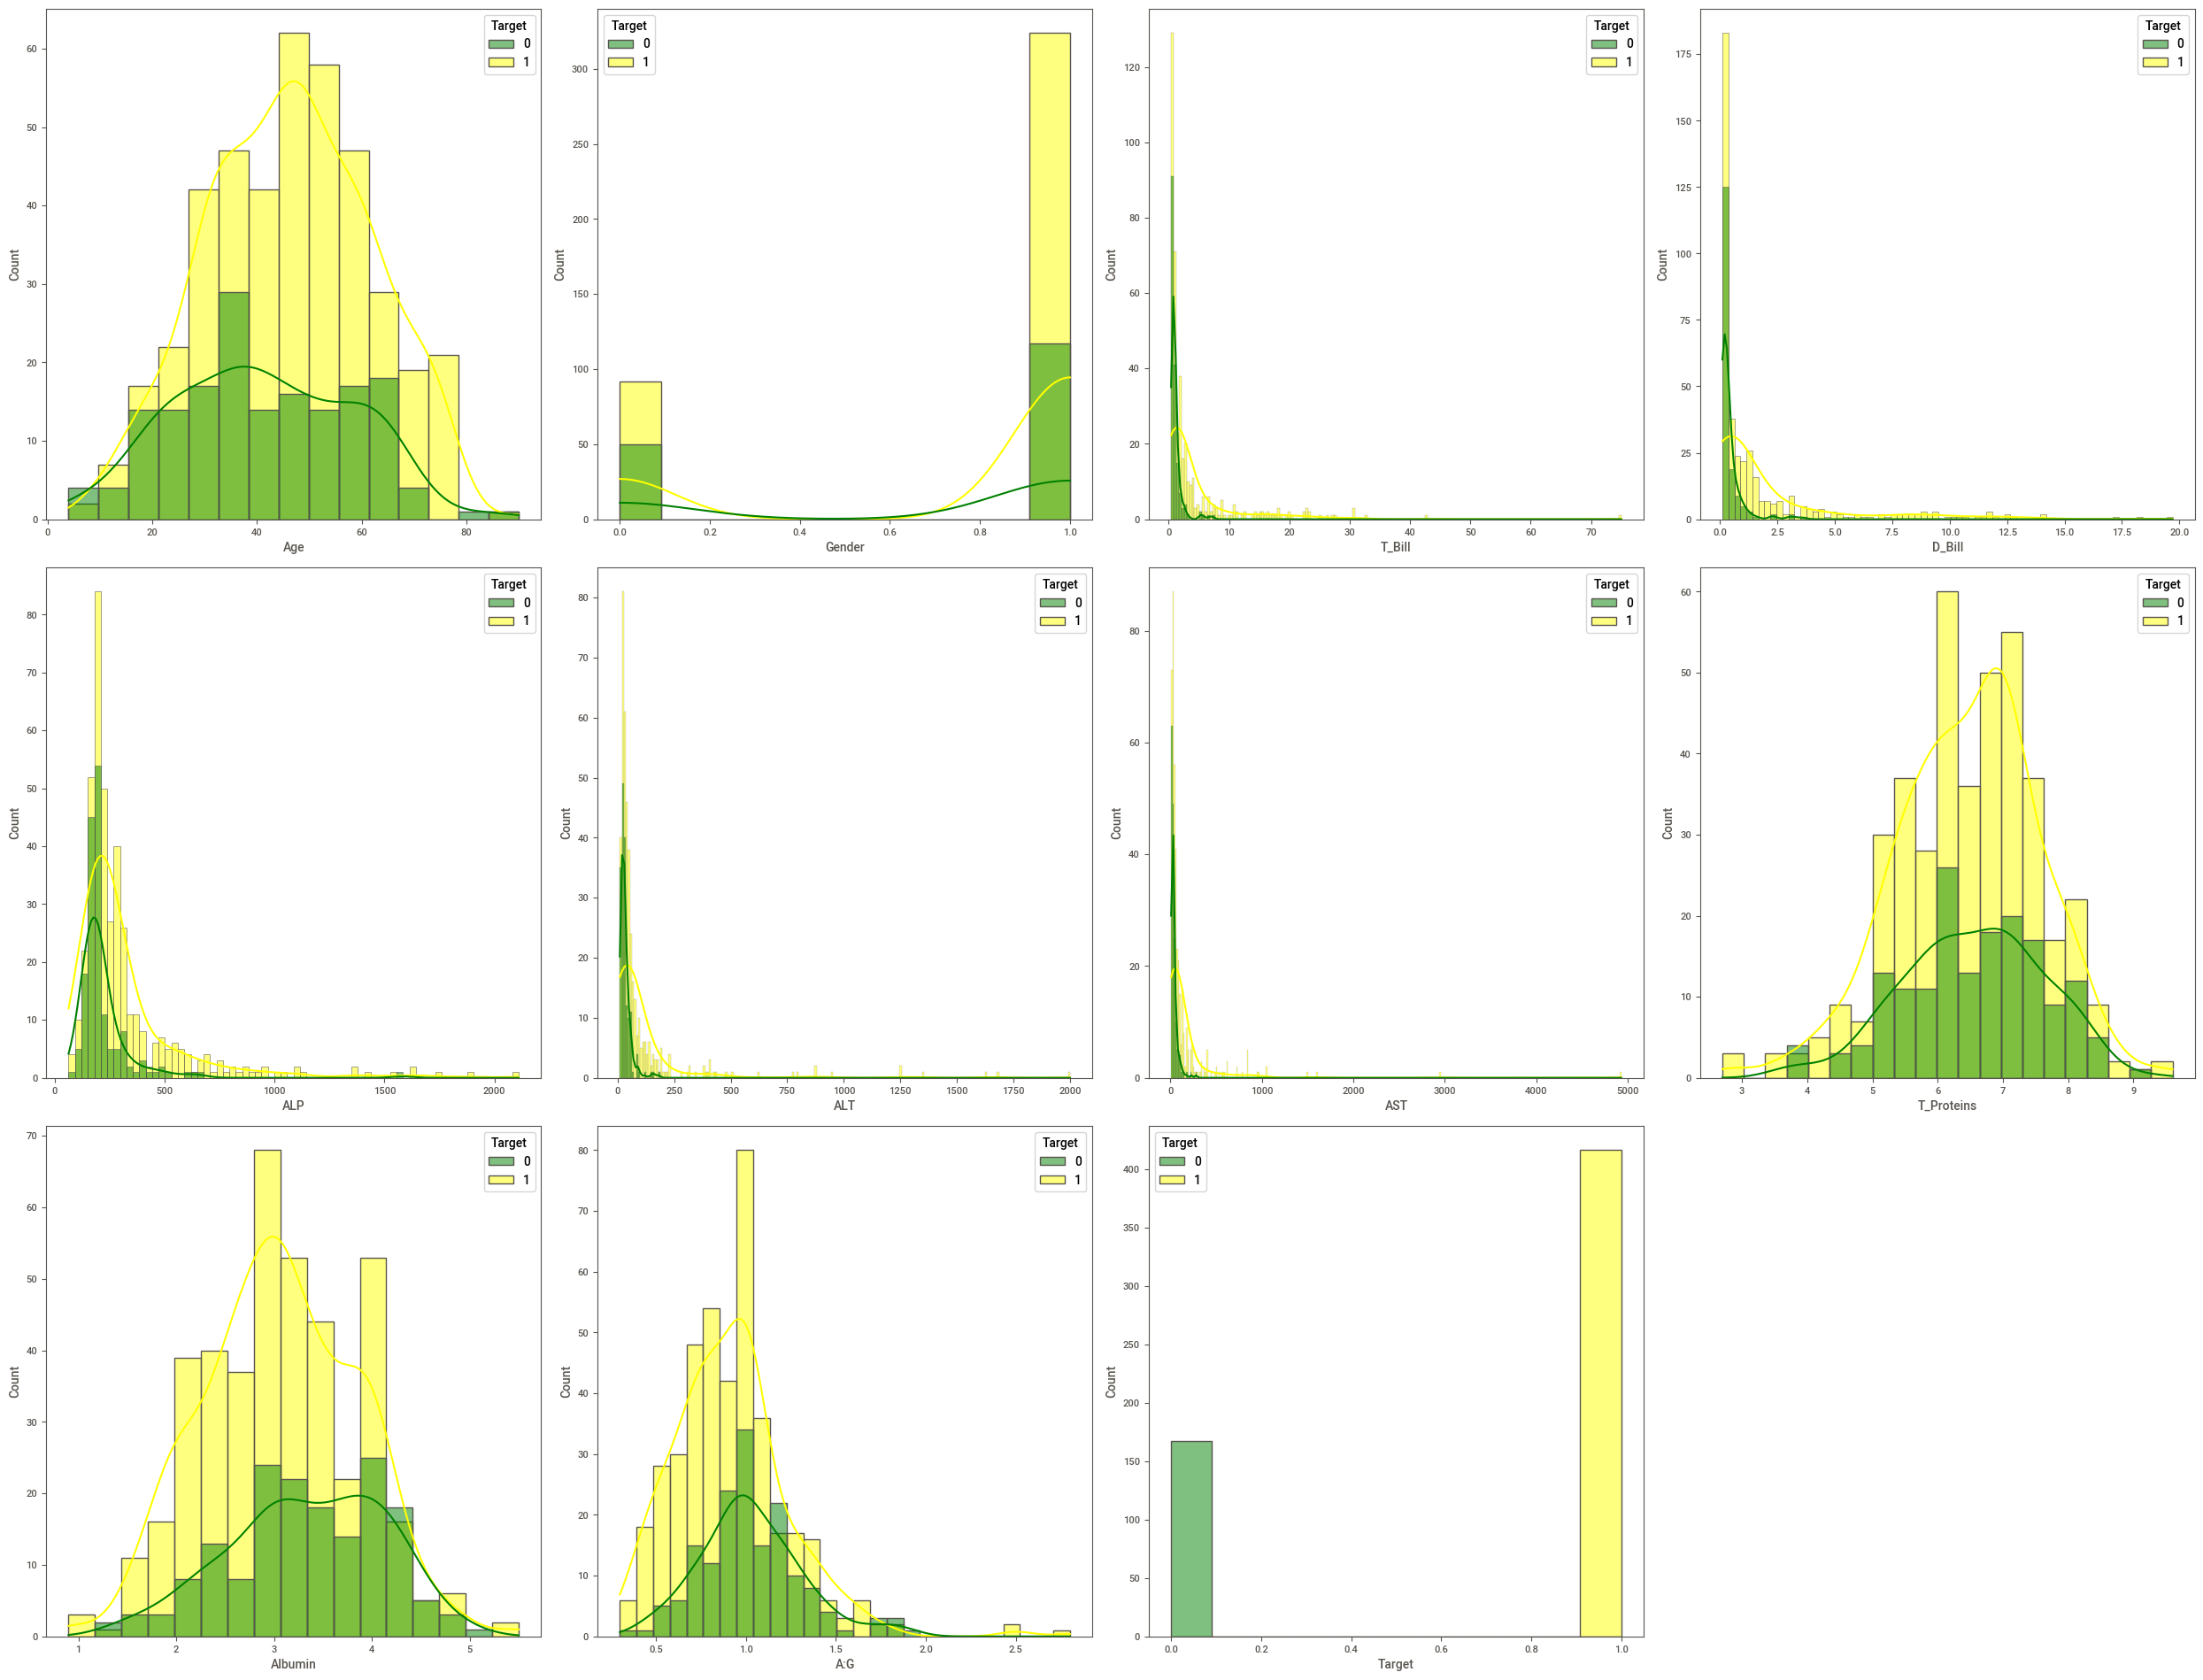

In [16]:
plt.figure(figsize=(25,25))
p=1
for i in data:
    ax=plt.subplot(4,4,p)
    sns.histplot(x=data[i],kde=True,hue=data.Target,palette=['Green','Yellow'])
    p+=1
plt.tight_layout()

## BIVARIATE ANALYSIS

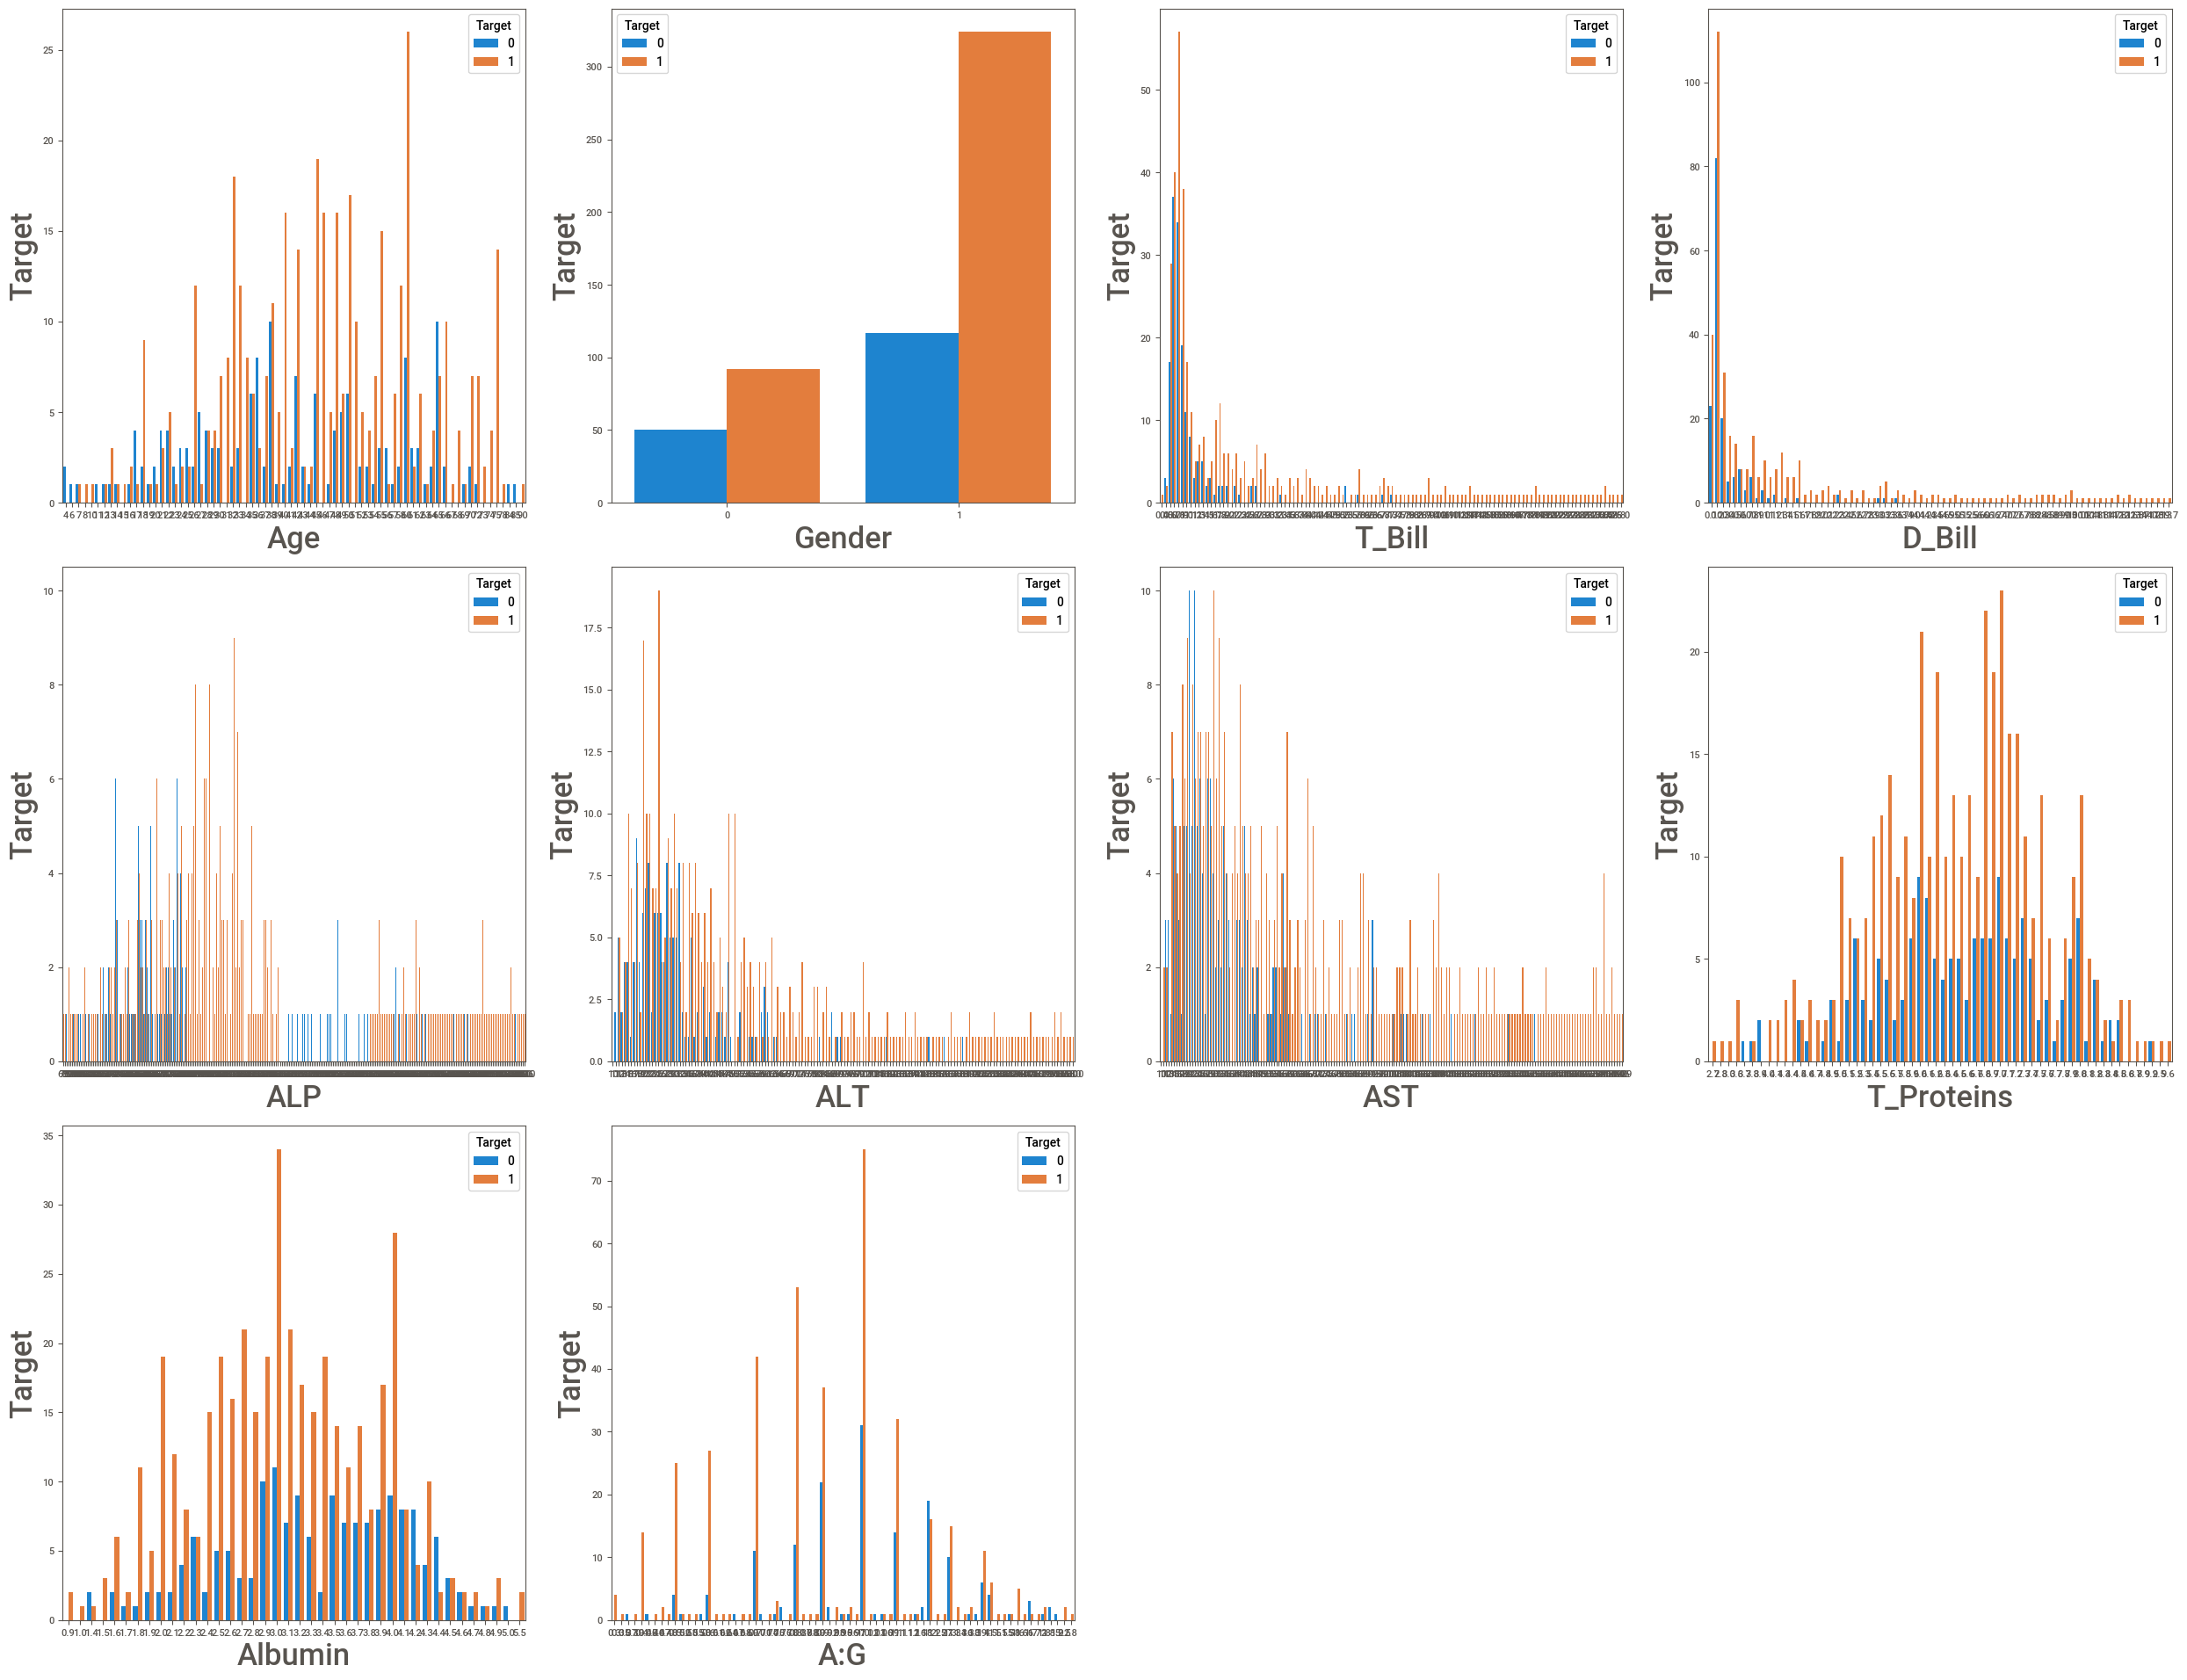

In [17]:
plt.figure(figsize=(25, 25), facecolor="white")
p = 1
for i in data.iloc[:,:10]:
        ax = plt.subplot(4, 4, p)
        sns.countplot(x=data[i], hue=data["Target"])
        plt.xlabel(i, fontsize=25)
        plt.ylabel("Target", fontsize=25)
        p+=1
plt.tight_layout()

## MULTIVARIATE ANALYSIS

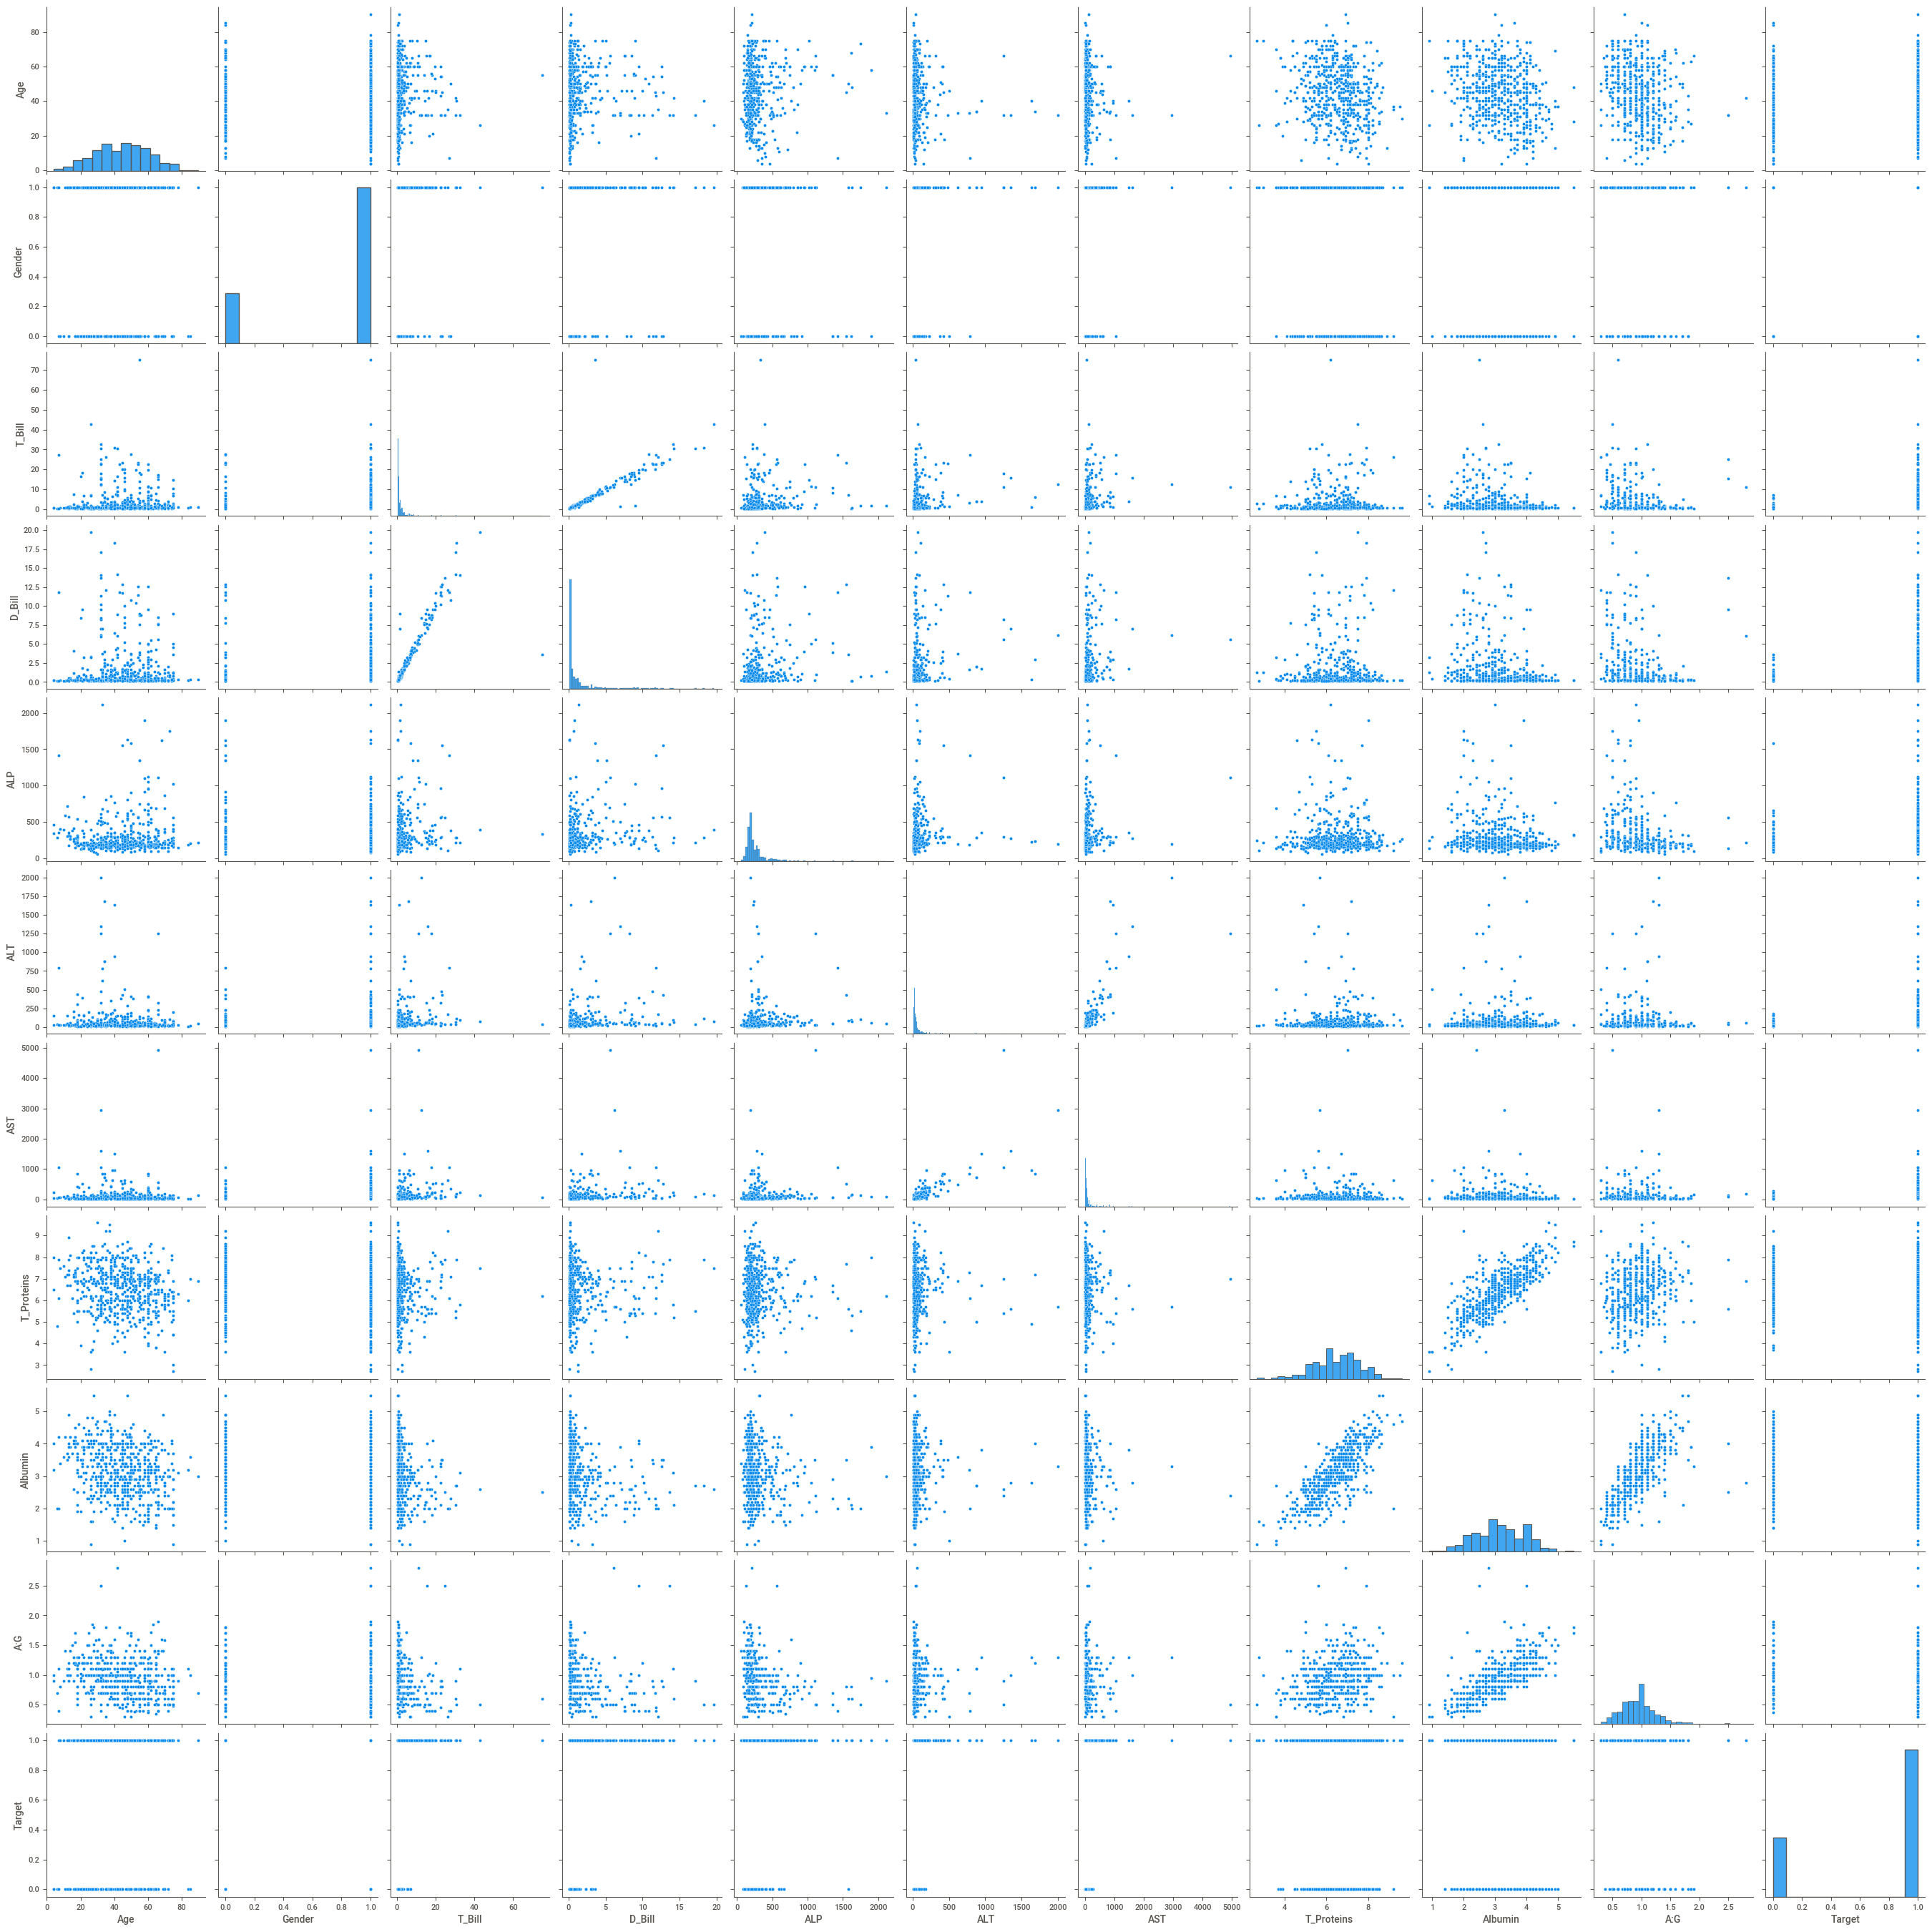

In [18]:
sns.pairplot(data)

# DATA PRE PROCESSING

In [19]:
#FINDING THE MISSING VALUES
data.isnull().sum()

Age           0
Gender        0
T_Bill        0
D_Bill        0
ALP           0
ALT           0
AST           0
T_Proteins    0
Albumin       0
A:G           4
Target        0
dtype: int64

In [20]:
data['A:G'].fillna(data['A:G'].mean(),inplace=True)

MISSING VALUES HAS BEEN REPLACED WITH ITS MEAN

In [21]:
# FIND DUPLICATED VALUES
data.duplicated().sum()

13

In [22]:
data=data.drop_duplicates()

DUPLICATE ROWS ARE DROPPED

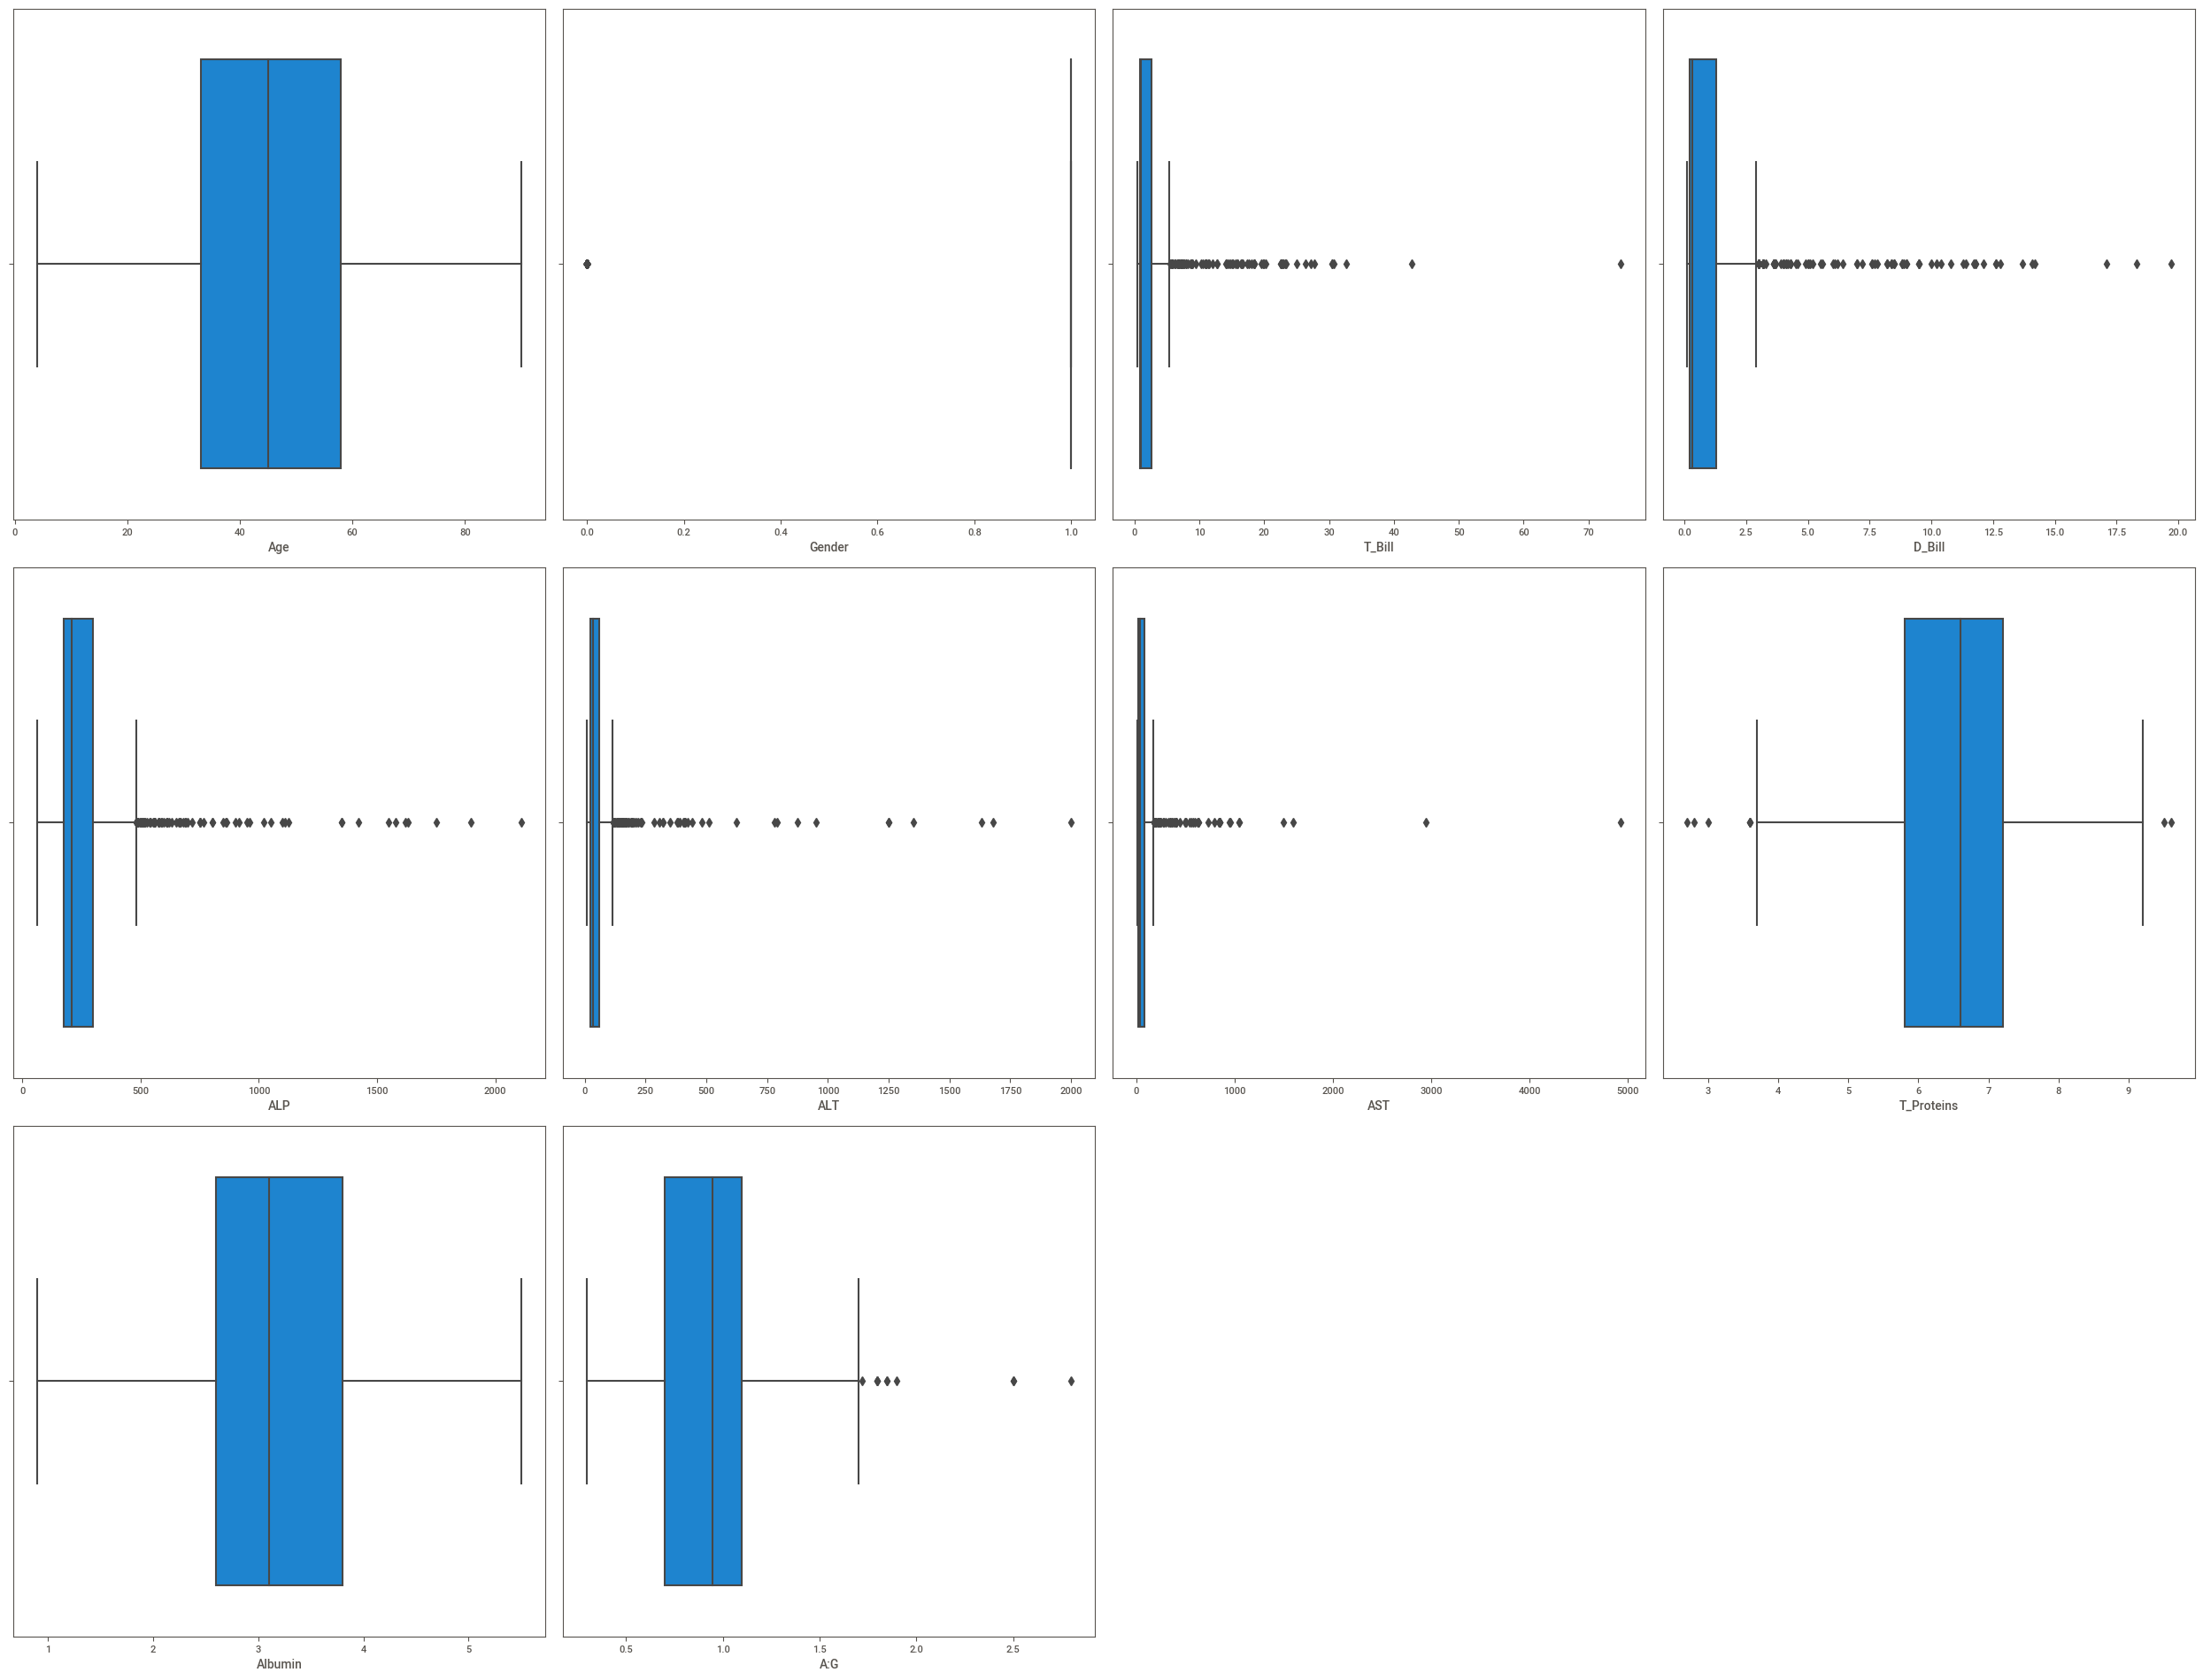

In [23]:
# CHECKING FOR OUTLIERS
plt.figure(figsize=(25,25))
p=1
for i in data.iloc[:,:10]:
    ax=plt.subplot(4,4,p)
    sns.boxplot(x=data[i],data=data)
    p+=1
plt.tight_layout()

# FEATURE SELECTION

In [24]:
data.corr()

,Age,Gender,T_Bill,D_Bill,ALP,ALT,AST,T_Proteins,Albumin,A:G,Target
Age,1.000000,0.058237,0.011500,0.007050,0.081673,-0.083383,-0.016753,-0.197052,-0.271170,-0.215633,0.138093
Gender,0.058237,1.000000,0.090298,0.101730,-0.023014,0.084317,0.081497,-0.085895,-0.091369,-0.005566,0.078501
T_Bill,0.011500,0.090298,1.000000,0.874116,0.206239,0.217471,0.238678,-0.008588,-0.224124,-0.207621,0.224430
D_Bill,0.007050,0.101730,0.874116,1.000000,0.234609,0.237450,0.258489,-0.000875,-0.230751,-0.201386,0.250666
ALP,0.081673,-0.023014,0.206239,0.234609,1.000000,0.126830,0.167230,-0.030048,-0.168318,-0.236028,0.187560
ALT,-0.083383,0.084317,0.217471,0.237450,0.126830,1.000000,0.791857,-0.035193,-0.027973,-0.006516,0.161917
AST,-0.016753,0.081497,0.238678,0.258489,0.167230,0.791857,1.000000,-0.022000,-0.085180,-0.072877,0.151101
T_Proteins,-0.197052,-0.085895,-0.008588,-0.000875,-0.030048,-0.035193,-0.022000,1.000000,0.784731,0.233576,-0.037794
Albumin,-0.271170,-0.091369,-0.224124,-0.230751,-0.168318,-0.027973,-0.085180,0.784731,1.000000,0.684087,-0.166835
A:G,-0.215633,-0.005566,-0.207621,-0.201386,-0.236028,-0.006516,-0.072877,0.233576,0.684087,1.000000,-0.170523


In [25]:
plt.figure(figsize=(100,100))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn",annot_kws={"size":80})
plt.xticks(fontsize=80)
plt.yticks(fontsize=80)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Gender'),
  Text(0, 2.5, 'T_Bill'),
  Text(0, 3.5, 'D_Bill'),
  Text(0, 4.5, 'ALP'),
  Text(0, 5.5, 'ALT'),
  Text(0, 6.5, 'AST'),
  Text(0, 7.5, 'T_Proteins'),
  Text(0, 8.5, 'Albumin'),
  Text(0, 9.5, 'A:G'),
  Text(0, 10.5, 'Target')])

THERE IS NO HIGH CORRELATION BETWEEN EACH COLUMNS

# MODEL CREATION

In [26]:
#SPLITTING X AND Y
X=data.drop('Target',axis=1)
y=data['Target']

In [27]:
df=data
print ('Total Unhealthy Livers :  {} and its percentage is {} %'.format(df.Target.value_counts()[1], round(df.Target.value_counts()[1]/df.Target.value_counts().sum()*100,2)) )
print ('Total Healthy Livers :  {} and its percentage is {} %'.format(df.Target.value_counts()[0], round(df.Target.value_counts()[0]/df.Target.value_counts().sum()*100,2)) )

Total Unhealthy Livers :  406 and its percentage is 71.23 %
Total Healthy Livers :  164 and its percentage is 28.77 %


THIS DATA IS IMBALANCED

### OVER SAMPLING

In [28]:
no_disease=data[data['Target']==0]
disease=data[data['Target']==1]
print(disease.shape,no_disease.shape)

(406, 11) (164, 11)


In [29]:
os=RandomOverSampler(random_state=10)

In [30]:
X_os,y_os=os.fit_resample(X,y)

In [31]:
X_os.shape,y_os.shape

((812, 10), (812,))

# MODEL1 - RANDOM FOREST

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X_os,y_os,test_size=0.2,random_state=10)

In [33]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt'] 
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=300, cv=3, 
                               verbose=3, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 300 candidates, totalling 900 fits
Best paramters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False})


In [34]:
rf_clf2 = RandomForestClassifier(n_estimators= 800, min_samples_split= 2, min_samples_leaf= 1,\
                                 max_features= 'sqrt', max_depth= 70, bootstrap= False)
rf_clf2.fit(X_train, y_train) 
y_predict=rf_clf2.predict(X_test)

In [35]:
y_pred=rf_clf2.predict(X_train)

In [36]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       321

    accuracy                           1.00       649
   macro avg       1.00      1.00      1.00       649
weighted avg       1.00      1.00      1.00       649



TRAINING ACCURACY IS 100%

In [37]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        78
           1       0.87      0.76      0.81        85

    accuracy                           0.82       163
   macro avg       0.82      0.82      0.82       163
weighted avg       0.82      0.82      0.82       163



THIS MODEL GIVES US A ACCURACY OF 82%

# MODEL2 - DECISION TREE

In [38]:
dt=DecisionTreeClassifier()

In [39]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20)),
}

tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=3, cv=3)
tree_cv.fit(X_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params}")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}


In [40]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=17,min_samples_leaf= 1,min_samples_split=3,splitter='best')

In [41]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_split=3)

In [42]:
y_hat1=dt1.predict(X_test)
y_hat1

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [43]:
y_train_predict1=dt1.predict(X_train)

In [44]:
print(classification_report(y_train,y_train_predict1))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       328
           1       0.98      0.93      0.95       321

    accuracy                           0.95       649
   macro avg       0.96      0.95      0.95       649
weighted avg       0.95      0.95      0.95       649



TRAINING ACCURACY IS 95%

In [45]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.69      0.88      0.78        78
           1       0.86      0.64      0.73        85

    accuracy                           0.75       163
   macro avg       0.77      0.76      0.75       163
weighted avg       0.78      0.75      0.75       163



THIS MODEL GIVES US A ACCURACY OF 80%

# MODEL3 - SVM

In [46]:
param_grid1 = {'C': [1, 5, 10,30,60,70,100], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
             } 
model=SVC()
grid = GridSearchCV(model, param_grid1,verbose = 3,scoring='f1',cv=3)

In [47]:
grid.fit(X_os,y_os)

Fitting 3 folds for each of 35 candidates, totalling 105 fits
[CV 1/3] END ......................C=1, gamma=1;, score=0.904 total time=   0.0s
[CV 2/3] END ......................C=1, gamma=1;, score=0.951 total time=   0.0s
[CV 3/3] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 1/3] END ....................C=1, gamma=0.1;, score=0.900 total time=   0.0s
[CV 2/3] END ....................C=1, gamma=0.1;, score=0.947 total time=   0.0s
[CV 3/3] END ....................C=1, gamma=0.1;, score=0.996 total time=   0.0s
[CV 1/3] END ...................C=1, gamma=0.01;, score=0.857 total time=   0.0s
[CV 2/3] END ...................C=1, gamma=0.01;, score=0.831 total time=   0.0s
[CV 3/3] END ...................C=1, gamma=0.01;, score=0.915 total time=   0.0s
[CV 1/3] END ..................C=1, gamma=0.001;, score=0.761 total time=   0.0s
[CV 2/3] END ..................C=1, gamma=0.001;, score=0.632 total time=   0.0s
[CV 3/3] END ..................C=1, gamma=0.001

[CV 3/3] END ................C=100, gamma=0.001;, score=0.846 total time=   0.0s
[CV 1/3] END ...............C=100, gamma=0.0001;, score=0.762 total time=   0.0s
[CV 2/3] END ...............C=100, gamma=0.0001;, score=0.597 total time=   0.0s
[CV 3/3] END ...............C=100, gamma=0.0001;, score=0.734 total time=   0.0s


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 30, 60, 70, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [48]:
print("Best Parameters of C & Gamma are:",grid.best_params_)

Best Parameters of C & Gamma are: {'C': 1, 'gamma': 1}


In [49]:
clf=SVC(C=1, gamma=1,random_state=42)

In [50]:
clf.fit(X_train, y_train)

SVC(C=1, gamma=1, random_state=42)

In [51]:
y_tprd=clf.predict(X_train)

In [52]:
print(classification_report(y_train,y_tprd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       321

    accuracy                           1.00       649
   macro avg       1.00      1.00      1.00       649
weighted avg       1.00      1.00      1.00       649



TRAINING ACCURACY IS 100%

In [53]:
y_clf=clf.predict(X_test)

In [54]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        78
           1       0.87      1.00      0.93        85

    accuracy                           0.92       163
   macro avg       0.93      0.92      0.92       163
weighted avg       0.93      0.92      0.92       163



THIS MODEL GIVES US A ACCURACY OF 92%

# MODEL4 - LOGISTIC REGRESSION

In [55]:
#SCALING
sc=StandardScaler()

In [56]:
X_sc=X
X_sc=sc.fit_transform(X)

In [57]:
X_sc

array([[ 1.24174059, -1.75254916, -0.41864741, ...,  0.27928958,
         0.18973749, -0.15082448],
       [ 1.0568741 ,  0.5705974 ,  1.21011064, ...,  0.92305933,
         0.06412731, -0.6536048 ],
       [ 1.0568741 ,  0.5705974 ,  0.63525486, ...,  0.4632238 ,
         0.18973749, -0.18224825],
       ...,
       [ 0.4406525 ,  0.5705974 , -0.40267919, ..., -0.08857885,
         0.06412731,  0.16341322],
       [-0.85341287,  0.5705974 , -0.32283811, ...,  0.27928958,
         0.31534768,  0.16341322],
       [-0.42205774,  0.5705974 , -0.37074276, ...,  0.73912512,
         1.57144955,  1.73460172]])

In [58]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Target, Length: 570, dtype: int64

In [59]:
lr=LogisticRegression()

In [60]:
param_grid2 = {'C': [1, 5, 10,30,60,70,100], 
              'verbose': [0, 1, 3, 4, 5]
             } 
grid1= GridSearchCV(lr, param_grid2,verbose = 3,scoring='f1',cv=3)

In [61]:
grid1.fit(X_sc,y)

Fitting 3 folds for each of 35 candidates, totalling 105 fits
[CV 1/3] END ....................C=1, verbose=0;, score=0.828 total time=   0.0s
[CV 2/3] END ....................C=1, verbose=0;, score=0.801 total time=   0.0s
[CV 3/3] END ....................C=1, verbose=0;, score=0.818 total time=   0.0s
[CV 1/3] END ....................C=1, verbose=1;, score=0.828 total time=   0.0s
[CV 2/3] END ....................C=1, verbose=1;, score=0.801 total time=   0.0s
[CV 3/3] END ....................C=1, verbose=1;, score=0.818 total time=   0.0s
[CV 1/3] END ....................C=1, verbose=3;, score=0.828 total time=   0.0s
[CV 2/3] END ....................C=1, verbose=3;, score=0.801 total time=   0.0s
[CV 3/3] END ....................C=1, verbose=3;, score=0.818 total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

[CV 1/3] END ....................C=1, verbose=4;, score=0.828 total time=   0.0s
[CV 2/3] END ....................C=1, verbose=4;, score=0.801 total time=   0.0s
[CV 3/3] END ....................C=1, verbose=4;, score=0.818 total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[CV 1/3] END ....................C=1, verbose=5;, score=0.828 total time=   0.0s
[CV 2/3] END ....................C=1, verbose=5;, score=0.801 total time=   0.0s
[CV 3/3] END ....................C=1, verbose=5;, score=0.818 total time=   0.0s
[CV 1/3] END ....................C=5, verbose=0;, score=0.826 total time=   0.0s
[CV 2/3] END ....................C=5, verbose=0;, score=0.803 total time=   0.0s
[CV 3/3] END ....................C=5, verbose=0;, score=0.819 total time=   0.0s
[CV 1/3] END ....................C=5, verbose=1;, score=0.826 total time=   0.0s
[CV 2/3] END ....................C=5, verbose=1;, score=0.803 total time=   0.0s
[CV 3/3] END ....................C=5, verbose=1;, score=0.819 total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Para

[CV 1/3] END ....................C=5, verbose=3;, score=0.826 total time=   0.0s
[CV 2/3] END ....................C=5, verbose=3;, score=0.803 total time=   0.0s
[CV 3/3] END ....................C=5, verbose=3;, score=0.819 total time=   0.0s
[CV 1/3] END ....................C=5, verbose=4;, score=0.826 total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/3] END ....................C=5, verbose=4;, score=0.803 total time=   0.0s
[CV 3/3] END ....................C=5, verbose=4;, score=0.819 total time=   0.0s
[CV 1/3] END ....................C=5, verbose=5;, score=0.826 total time=   0.0s
[CV 2/3] END ....................C=5, verbose=5;, score=0.803 total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/3] END ....................C=5, verbose=5;, score=0.819 total time=   0.0s
[CV 1/3] END ...................C=10, verbose=0;, score=0.826 total time=   0.0s
[CV 2/3] END ...................C=10, verbose=0;, score=0.794 total time=   0.0s
[CV 3/3] END ...................C=10, verbose=0;, score=0.819 total time=   0.0s
[CV 1/3] END ...................C=10, verbose=1;, score=0.826 total time=   0.0s
[CV 2/3] END ...................C=10, verbose=1;, score=0.794 total time=   0.0s
[CV 3/3] END ...................C=10, verbose=1;, score=0.819 total time=   0.0s
[CV 1/3] END ...................C=10, verbose=3;, score=0.826 total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/3] END ...................C=10, verbose=3;, score=0.794 total time=   0.0s
[CV 3/3] END ...................C=10, verbose=3;, score=0.819 total time=   0.0s
[CV 1/3] END ...................C=10, verbose=4;, score=0.826 total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/3] END ...................C=10, verbose=4;, score=0.794 total time=   0.0s
[CV 3/3] END ...................C=10, verbose=4;, score=0.819 total time=   0.0s
[CV 1/3] END ...................C=10, verbose=5;, score=0.826 total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/3] END ...................C=10, verbose=5;, score=0.794 total time=   0.0s
[CV 3/3] END ...................C=10, verbose=5;, score=0.819 total time=   0.0s
[CV 1/3] END ...................C=30, verbose=0;, score=0.826 total time=   0.0s
[CV 2/3] END ...................C=30, verbose=0;, score=0.788 total time=   0.0s
[CV 3/3] END ...................C=30, verbose=0;, score=0.819 total time=   0.0s
[CV 1/3] END ...................C=30, verbose=1;, score=0.826 total time=   0.0s
[CV 2/3] END ...................C=30, verbose=1;, score=0.788 total time=   0.0s
[CV 3/3] END ...................C=30, verbose=1;, score=0.819 total time=   0.0s
[CV 1/3] END ...................C=30, verbose=3;, score=0.826 total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/3] END ...................C=30, verbose=3;, score=0.788 total time=   0.0s
[CV 3/3] END ...................C=30, verbose=3;, score=0.819 total time=   0.0s
[CV 1/3] END ...................C=30, verbose=4;, score=0.826 total time=   0.0s
[CV 2/3] END ...................C=30, verbose=4;, score=0.788 total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/3] END ...................C=30, verbose=4;, score=0.819 total time=   0.0s
[CV 1/3] END ...................C=30, verbose=5;, score=0.826 total time=   0.0s
[CV 2/3] END ...................C=30, verbose=5;, score=0.788 total time=   0.0s
[CV 3/3] END ...................C=30, verbose=5;, score=0.819 total time=   0.0s
[CV 1/3] END ...................C=60, verbose=0;, score=0.828 total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/3] END ...................C=60, verbose=0;, score=0.794 total time=   0.0s
[CV 3/3] END ...................C=60, verbose=0;, score=0.819 total time=   0.0s
[CV 1/3] END ...................C=60, verbose=1;, score=0.828 total time=   0.0s
[CV 2/3] END ...................C=60, verbose=1;, score=0.794 total time=   0.0s
[CV 3/3] END ...................C=60, verbose=1;, score=0.819 total time=   0.0s
[CV 1/3] END ...................C=60, verbose=3;, score=0.828 total time=   0.0s
[CV 2/3] END ...................C=60, verbose=3;, score=0.794 total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/3] END ...................C=60, verbose=3;, score=0.819 total time=   0.0s
[CV 1/3] END ...................C=60, verbose=4;, score=0.828 total time=   0.0s
[CV 2/3] END ...................C=60, verbose=4;, score=0.794 total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[CV 3/3] END ...................C=60, verbose=4;, score=0.819 total time=   0.0s
[CV 1/3] END ...................C=60, verbose=5;, score=0.828 total time=   0.0s
[CV 2/3] END ...................C=60, verbose=5;, score=0.794 total time=   0.0s
[CV 3/3] END ...................C=60, verbose=5;, score=0.819 total time=   0.0s
[CV 1/3] END ...................C=70, verbose=0;, score=0.828 total time=   0.0s
[CV 2/3] END ...................C=70, verbose=0;, score=0.794 total time=   0.0s
[CV 3/3] END ...................C=70, verbose=0;, score=0.819 total time=   0.0s
[CV 1/3] END ...................C=70, verbose=1;, score=0.828 total time=   0.0s
[CV 2/3] END ...................C=70, verbose=1;, score=0.794 total time=   0.0s
[CV 3/3] END ...................C=70, verbose=1;, score=0.819 total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/3] END ...................C=70, verbose=3;, score=0.828 total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/3] END ...................C=70, verbose=3;, score=0.794 total time=   0.0s
[CV 3/3] END ...................C=70, verbose=3;, score=0.819 total time=   0.0s
[CV 1/3] END ...................C=70, verbose=4;, score=0.828 total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 2/3] END ...................C=70, verbose=4;, score=0.794 total time=   0.0s
[CV 3/3] END ...................C=70, verbose=4;, score=0.819 total time=   0.0s
[CV 1/3] END ...................C=70, verbose=5;, score=0.828 total time=   0.0s
[CV 2/3] END ...................C=70, verbose=5;, score=0.794 total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Para

[CV 3/3] END ...................C=70, verbose=5;, score=0.819 total time=   0.0s
[CV 1/3] END ..................C=100, verbose=0;, score=0.828 total time=   0.0s
[CV 2/3] END ..................C=100, verbose=0;, score=0.794 total time=   0.0s
[CV 3/3] END ..................C=100, verbose=0;, score=0.819 total time=   0.0s
[CV 1/3] END ..................C=100, verbose=1;, score=0.828 total time=   0.0s
[CV 2/3] END ..................C=100, verbose=1;, score=0.794 total time=   0.0s
[CV 3/3] END ..................C=100, verbose=1;, score=0.819 total time=   0.0s
[CV 1/3] END ..................C=100, verbose=3;, score=0.828 total time=   0.0s
[CV 2/3] END ..................C=100, verbose=3;, score=0.794 total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/3] END ..................C=100, verbose=3;, score=0.819 total time=   0.0s
[CV 1/3] END ..................C=100, verbose=4;, score=0.828 total time=   0.0s
[CV 2/3] END ..................C=100, verbose=4;, score=0.794 total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[CV 3/3] END ..................C=100, verbose=4;, score=0.819 total time=   0.0s
[CV 1/3] END ..................C=100, verbose=5;, score=0.828 total time=   0.0s
[CV 2/3] END ..................C=100, verbose=5;, score=0.794 total time=   0.0s
[CV 3/3] END ..................C=100, verbose=5;, score=0.819 total time=   0.0s


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10, 30, 60, 70, 100],
                         'verbose': [0, 1, 3, 4, 5]},
             scoring='f1', verbose=3)

In [62]:
print("Best Parameters of C & verbose are:",grid1.best_params_)

Best Parameters of C & verbose are: {'C': 5, 'verbose': 0}


In [63]:
clf1=LogisticRegression(C=5, verbose=0,random_state=42)

In [64]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_sc,y)

In [65]:
clf1.fit(X_train1,y_train1)

LogisticRegression(C=5, random_state=42)

In [66]:
y_trn_pred=clf.predict(X_train1)

In [67]:
print(classification_report(y_train1,y_trn_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       125
           1       0.71      1.00      0.83       302

    accuracy                           0.71       427
   macro avg       0.35      0.50      0.41       427
weighted avg       0.50      0.71      0.59       427



TRAINING ACCURACY IS 57%

In [68]:
y_clf1=clf1.predict(X_test1)

In [69]:
print(classification_report(y_test1,y_clf1))

              precision    recall  f1-score   support

           0       0.46      0.15      0.23        39
           1       0.75      0.93      0.83       104

    accuracy                           0.72       143
   macro avg       0.60      0.54      0.53       143
weighted avg       0.67      0.72      0.67       143



THIS MODEL GIVES AS A ACCURACY OF 74%

In [70]:
df={'model':['RANDOM FOREST','DECISION TREE','SVM','LOGISTIC'],
    'accuracy':['82%','80%','92%','74%']}
df=pd.DataFrame(df)
print(df)

           model accuracy
0  RANDOM FOREST      82%
1  DECISION TREE      80%
2            SVM      92%
3       LOGISTIC      74%


### WE CAN SEE THAT HIGH ACCURACY IS SHOWN BY SVM MODEL (92%)

# PREDICTING DISEASE WITH HELP OF ATTRIBUTES

In [71]:
def liver(a):
    an = clf.predict(a)
    if an==0:
        print('the person is okay')
    else:
        print('the person have liver disease')

In [72]:
liver([[55,1,18.4,8.8,206,64,178,6.2,1.8,0.4]])

the person have liver disease


In [73]:
liver([[38,0,0.8,0.2,145,19,23,6.1,3.1,1.03]])

the person is okay


In [74]:
liver([[26,0,0.9,0.2,154,16,12,7,3.5,1]])

the person have liver disease


AS PER THE GOVERNMENT DATA ABOUT LIVER PATIENT,WE TOOK 3 RANDOM PERSONS DATA AND GIVE TO THE MODEL.THE MODEL HAS PREDICTED EVERY 3 DATA CORRECTLY 

# CONCLUSION

IN CONCLUSION,MODELS HAVE SHOWN PROMISING RESULTS IN PREDICTING OUTCOMES FOR LIVER PATIENTS. BY LEVERAGING VARIOUS DATA POINTS SUCH  PERSONAL INFORMATION,BLOOD TEST RESULTS, AND LIVER CONDITION STUDIES, THESE MODELS CAN HELP HEALTHCARE PROVIDERS IDENTIFY PATIENTS AT RISK OF LIVER DISEASES AND MAKE INFORMED DECISION REGARDING TREATMENT.

1.THE GIVEN DATA DOESN'T HAVE ANY COLUMN NAME AND THE FIRST ROW COMES IN COLUMN NAME SPACE THUS I MAKE COLUMN NAME COME       DOWN AND RENAME THE COLUMN AS RESPECT TO DATA

2.THERE WERE 582 ROWS AND 11 COLUMNS IN 2 WERE AGE AND GENDER , 8 WERE ABOUT LIVER TEST RESULTS AND ONE IS RESULT              (TARGET)  

3.THE TARGET VALUES WERE [1,2] WHICH I CHANGED TO [0,1] FOR MORE EASIER TO DO

4.THERE WERE NULL VALUES WHICH I REPLACED WITH MEAN AND DUPLICATE ROWS WERE DROPPED.

5.THE GIVEN DATA WAS IMBALANCED , SO WE BALANCED IT WITH OVERSAMPLING

6.I PERFORMED 4 MODELS , RANDOM FOREST , DECISION TREE , SVM AND LOGISTIC REGRESSION . FROM THESE MODELS SVM GIVES HIGH       ACCURACY OF 92%

7.THIS SVM IS UESD TO PREDICT A RANDOM DATA FROM GOVERNMENT WEBSITE FOR LIVER PATIENTS AND EVERY 3 PREDICTION WERE CORRECT

# SUGGESTION

HAVING A HEALTHY DIET , DROPPING TOBACCO AND REDUCING ALCOHOL , MAINTAIN A HEALTHY BODY MASS , STAYING HYDRATED , MONITORING OUR OWN MEDICATIONS , GETTING PROPER VACCINATION ON THE RIGHT TIME , HAVING A HABIT OF TAKING REGULAR HEALTH CHECK UP , AND ALSO SEEKING HELP FOR THE PROFESSIONAL WILL HELP US TO HAVE A HEALTHY LIFE STYLE AND CONTROLLING TO NOT HAVE DISEASES LIKE LIVER DISEASES

# RISK

SINCE ALL OF THE ATTRIBUTES ARE FROM MEDICAL DOMAIN , IT WAS DIFFICULT TO LEARN ABOUT THEM AND FIND THE INSIGHT . BUT LATER WE GOT FEMILIAR WITH THEM AND FOUND ALL INSIGHTS